In [ ]:
!pip install japanize_matplotlib  #matplotlibの日本語表示 library install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=992e6268f09e8b9aeb7c75fa6fbe4dbb1e8d15ba827e36de8955f5a2d2ee2b96
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
!pip install japanmap  #日本地図lirbary install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
#Library import

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras.losses import mean_squared_error
import keras.backend as K
import japanize_matplotlib
import japanmap as jm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

In [ ]:
#Excelからデータの読み込み

number_a = 1833
data_X_a = pd.read_excel('2016年9月~2017年5月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_a)
data_y_a = pd.read_excel('2016年9月~2017年5月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_a)

number_b = 1833
data_X_b = pd.read_excel('2017年9月~2018年5月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_b)
data_y_b = pd.read_excel('2017年9月~2018年5月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_b)

number_c = 1833
data_X_c = pd.read_excel('2018年9月~2019年5月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_c)
data_y_c = pd.read_excel('2018年9月~2019年5月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_c)

number_d = 1833
data_X_d = pd.read_excel('2019年9月~2020年5月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_d)
data_y_d = pd.read_excel('2019年9月~2020年5月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_d)

number_e = 1833
data_X_e = pd.read_excel('2020年9月~2021年5月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_e)
data_y_e = pd.read_excel('2020年9月~2021年5月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_e)

number_f = 1833
data_X_f = pd.read_excel('2021年9月~2022年5月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_f)
data_y_f = pd.read_excel('2021年9月~2022年5月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_f)

number_g = 1551
data_X_g = pd.read_excel('2022年9月~2023年4月.xlsx', sheet_name = 2,  usecols = [2, 3, 4, 5, 10, 11, 12, 13], nrows = number_g)
data_y_g = pd.read_excel('2022年9月~2023年4月.xlsx', sheet_name = 3,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_g)

number_h = 1034
data_X_h = pd.read_excel('2023年9月~2024年1月.xlsx', sheet_name = 0,  usecols = [2, 3, 4, 5, 6, 7, 8, 9], nrows = number_h)
data_y_h = pd.read_excel('2023年9月~2024年1月.xlsx', sheet_name = 1,  usecols = [2, 3, 4, 5, 6, 7], nrows = number_h)


In [ ]:
data_y_h #データ確認

,Domestic,Whooper Swan:cygnus Cygnus(Anatidae),Greater White-Fronted Goose (Anser Albifrons),Tundra Swan (Cygnus Columbianus),Eurasian Wigeon:anas Penelope(Anatidae),Others
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1029,0,0,0,0,0,0
1030,0,0,0,0,0,0
1031,0,0,0,0,0,0
1032,0,0,0,0,0,0


In [ ]:
#データの構造変換

data_array_X_a=data_X_a.values
data_array_X_b=data_X_b.values
data_array_X_c=data_X_c.values
data_array_X_d=data_X_d.values
data_array_X_e=data_X_e.values
data_array_X_f=data_X_f.values
data_array_X_g=data_X_g.values
data_array_X_h=data_X_h.values
data_array_X = np.concatenate((data_array_X_a, data_array_X_b, data_array_X_c, data_array_X_d, data_array_X_e, data_array_X_f, data_array_X_g, data_array_X_h), axis=0)
reshaped_array_X = data_array_X.reshape(-1, 47, 8)
final_array_X = reshaped_array_X.reshape(-1, 8*47)


data_array_y_a=data_y_a.values
data_array_y_b=data_y_b.values
data_array_y_c=data_y_c.values
data_array_y_d=data_y_d.values
data_array_y_e=data_y_e.values
data_array_y_f=data_y_f.values
data_array_y_g=data_y_g.values
data_array_y_h=data_y_h.values
data_array_y = np.concatenate((data_array_y_a, data_array_y_b, data_array_y_c, data_array_y_d, data_array_y_e, data_array_y_f, data_array_y_g, data_array_y_h), axis=0)
reshaped_array_y = data_array_y.reshape(-1, 47, 6)
reshaped_array_y = np.sum(reshaped_array_y, axis=-1, keepdims=True)
final_array_y = reshaped_array_y.reshape(-1, 47)
final_array_y = np.where(final_array_y > 0.5, 1, final_array_y)


print(np.shape(data_array_X))
print(np.shape(final_array_X))
print(np.shape(data_array_y))
print(np.shape(final_array_y))

(13583, 8)
(289, 376)
(13583, 6)
(289, 47)


In [ ]:
#時系列データに変換と設定及びtrain, testデータ分け

def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

Xdata = final_array_X
ydata = final_array_y
TRAIN_SPLIT = 268  # To make 12 time series 268
past_history = 8
future_target = 1
STEP = 1

X_train, y_train = multivariate_data(Xdata, ydata, 0, TRAIN_SPLIT, past_history, future_target, STEP, single_step=False)
X_test, y_test = multivariate_data(Xdata, ydata, TRAIN_SPLIT, None, past_history, future_target, STEP, single_step=False)

y_train = y_train.reshape(-1, 47)
y_test = y_test.reshape(-1, 47)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


(260, 8, 376)
(260, 47)
(12, 8, 376)
(12, 47)


In [ ]:
#モデル作成及び学習

from keras import metrics


#custum_mse関数定義
def custom_mse(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')
    mask = K.cast(K.not_equal(y_true, 0), K.floatx())
    y_true_masked = y_true * mask
    y_pred_masked = y_pred * mask
    sq_diff = K.square(y_pred_masked - y_true_masked)
    epsilon = K.epsilon()
    mse = K.sum(sq_diff) / (K.sum(mask) + epsilon)

    return mse


#custom_mse + mseであるcombined_mse関数の定義
def combined_mse(y_true, y_pred):
    custom_mse_loss = custom_mse(y_true, y_pred)
    standard_mse_loss = mean_squared_error(y_true, y_pred)
    total_loss = custom_mse_loss + standard_mse_loss

    return total_loss




model = Sequential()

# Add an LSTM layer

#case1
#model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
#model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
#model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
#model.add(Bidirectional(LSTM(units=50, return_sequences=False)))

#case2
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))


# Dense layer for output
model.add(Dense(units=y_train.shape[1]))


# Compile the model
model.compile(optimizer='adam', loss=combined_mse, metrics=['mse', custom_mse])


# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=4)




Epoch 1/300
65/65 [==============================] - 8s 8ms/step - loss: 0.4766 - mse: 0.1531 - custom_mse: 0.3235
Epoch 2/300
65/65 [==============================] - 1s 8ms/step - loss: 0.3703 - mse: 0.1731 - custom_mse: 0.1972
Epoch 3/300
65/65 [==============================] - 1s 8ms/step - loss: 0.3519 - mse: 0.1591 - custom_mse: 0.1927
Epoch 4/300
65/65 [==============================] - 1s 8ms/step - loss: 0.3219 - mse: 0.1659 - custom_mse: 0.1560
Epoch 5/300
65/65 [==============================] - 1s 8ms/step - loss: 0.3085 - mse: 0.1563 - custom_mse: 0.1522
Epoch 6/300
65/65 [==============================] - 1s 8ms/step - loss: 0.2893 - mse: 0.1540 - custom_mse: 0.1353
Epoch 7/300
65/65 [==============================] - 1s 8ms/step - loss: 0.2856 - mse: 0.1488 - custom_mse: 0.1368
Epoch 8/300
65/65 [==============================] - 1s 8ms/step - loss: 0.2494 - mse: 0.1360 - custom_mse: 0.1134
Epoch 9/300
65/65 [==============================] - 1s 8ms/step - loss: 0.2286 

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

#テストデータで予測する
y_pred_probs = model.predict(X_test)

#予測結果の評価

def custom_mse_eval_per_sample(y_true, y_pred):
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    custom_mse_losses = []
    for i in range(len(y_true_np)):
        single_y_true = y_true_np[i]
        single_y_pred = y_pred_np[i]
        mask = single_y_true != 0
        masked_y_true = single_y_true[mask]
        masked_y_pred = single_y_pred[mask]
        sq_diff = np.square(masked_y_pred - masked_y_true)
        mse = np.sum(sq_diff) / (np.sum(mask) + np.finfo(float).eps)
        custom_mse_losses.append(mse)
    return np.array(custom_mse_losses)


# Convert probabilities to binary predictions using 0.3 as a threshold
y_pred = (y_pred_probs > 0.2).astype(int)

# Flatten y_test and y_pred to ensure compatibility with evaluation metrics
y_test_flattened = y_test.flatten()
y_pred_flattened = y_pred.flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test_flattened, y_pred_flattened)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_test_flattened, y_pred_flattened)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test_flattened, y_pred_flattened)
print("Precision:", precision)

# Calculate the custom MSE loss for each sample
custom_mse_losses_per_sample = custom_mse_eval_per_sample(y_test, y_pred_probs)

# Calculate the standard MSE loss for each sample
standard_mse_losses_per_sample = np.mean(np.square(y_pred_probs - y_test), axis=1)

# Calculate the combined MSE loss for each sample
combined_mse_losses_per_sample = custom_mse_losses_per_sample + standard_mse_losses_per_sample

# Compute the mean of losses across all samples
mean_custom_mse_loss = np.mean(custom_mse_losses_per_sample)
mean_standard_mse_loss = np.mean(standard_mse_losses_per_sample)
mean_combined_mse_loss = np.mean(combined_mse_losses_per_sample)

print(f"Mean Combined MSE Loss: {mean_combined_mse_loss}")
print(f"Mean Custom MSE Loss: {mean_custom_mse_loss}")
print(f"Mean Standard MSE Loss: {mean_standard_mse_loss}")


1/1 [==============================] - 2s 2s/step
Accuracy: 0.7056737588652482
Recall: 0.6818181818181818
Precision: 0.16483516483516483
Mean Combined MSE Loss: 0.6036311997663618
Mean Custom MSE Loss: 0.48161702975391324
Mean Standard MSE Loss: 0.1220141700124485


(12, 47)


<ipython-input-19-88f2db6ef3bc>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


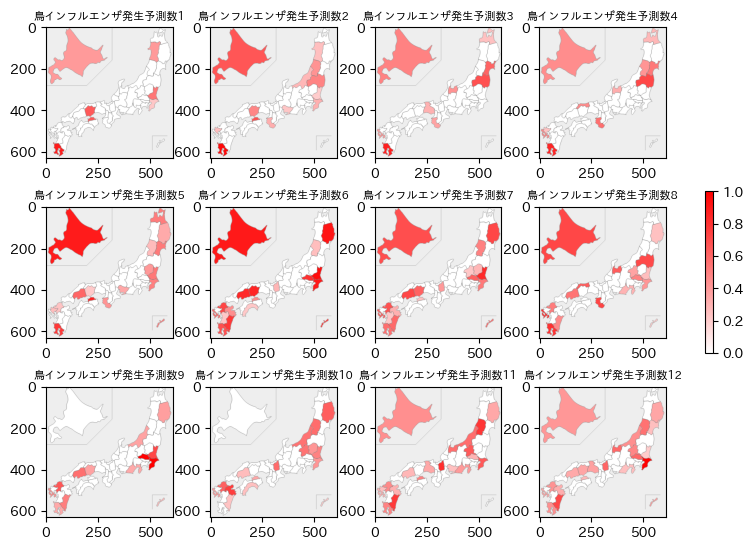

In [ ]:
import japanize_matplotlib
import japanmap as jm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

#10/28 ~ 1/13

prefectures = [
    '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県',
    '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県',
    '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
    '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県',
    '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県',
    '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
    '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県',
    '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'
]

# カラーマップを作成
cmap = LinearSegmentedColormap.from_list('custom_red', [(1, 1, 1), (1, 0, 0)], N=256)
min_val = 0
max_val = 1
norm = Normalize(vmin=min_val, vmax=max_val)

# グラフ用の領域（サブプロット）を作成
#渡り鳥、家きん、その他の合計
fig, axes = plt.subplots(3, 4, figsize=(10, 7),  gridspec_kw={'wspace':0.3, 'hspace':0})
print(np.shape(y_pred_probs))

for i in range(12):
    # データセットをDataFrameに変換
    final_data = y_pred_probs[i,:].reshape((1,47)).T
    modified_data = np.where(final_data < 0.2, 0, final_data)
    df = pd.DataFrame(modified_data, index=prefectures, columns=['鳥インフルエンザ発生数'])

    # サブプロットの行と列の位置を計算
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # タイトルを設定
    ax.set_title(f'鳥インフルエンザ発生予測数{i+1}', fontsize=8)

    # 日本地図を表示し、各都道府県をデータに基づいて色分け
    ax.imshow(jm.picture(df['鳥インフルエンザ発生数'].apply(lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex())))

# カラーマップの凡例を表示（全体に1つだけ表示）
fig.colorbar(plt.cm.ScalarMappable(norm, cmap), ax=axes.ravel().tolist(), shrink=0.3)
plt.tight_layout()
plt.show()


(12, 47)


<ipython-input-20-782473a631e7>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


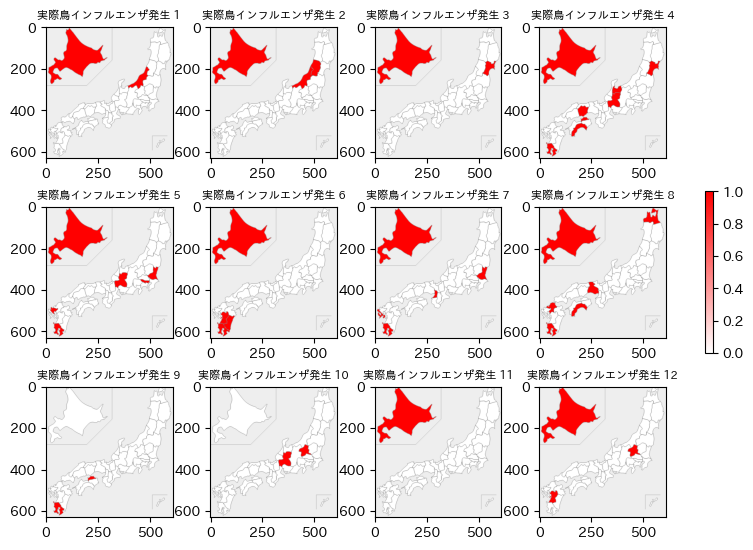

In [ ]:
#10/28 ~ 1/13に実際に発生した鳥インフルエンザ発生の図

real_data = y_test
print(np.shape(real_data))

# カラーマップを作成
cmap = LinearSegmentedColormap.from_list('custom_red', [(1, 1, 1), (1, 0, 0)], N=256)
min_val = 0
max_val = 1
norm = Normalize(vmin=min_val, vmax=max_val)

# グラフ用の領域（サブプロット）を作成
fig, axes = plt.subplots(3, 4, figsize=(10, 7),  gridspec_kw={'wspace':0.3, 'hspace':0})

for i in range(12):
    # データセットをDataFrameに変換
    final_data = real_data[i,:].reshape((1,47)).T
    df = pd.DataFrame(final_data, index=prefectures, columns=['鳥インフルエンザ発生'])

    # サブプロットの行と列の位置を計算
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # タイトルを設定
    ax.set_title(f'実際鳥インフルエンザ発生 {i+1}', fontsize=8)

    # 日本地図を表示し、各都道府県をデータに基づいて色分け
    ax.imshow(jm.picture(df['鳥インフルエンザ発生'].apply(lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex())))

# カラーマップの凡例を表示（全体に1つだけ表示）
fig.colorbar(plt.cm.ScalarMappable(norm, cmap), ax=axes.ravel().tolist(), shrink=0.3)
plt.tight_layout()
plt.show()